In [15]:
# 필요 데이터 불러오기 및 출력하기
# 전체로 보기 위해서 print 사용
import pandas as pd

co2 = pd.read_csv('../result/CO2.csv')
no = pd.read_csv('../result/NO.csv')
ch4 = pd.read_csv('../result/CH4.csv')
Antartica_mass = pd.read_csv('../result/Antartica_mass.csv')
temperature = pd.read_csv('../result/surface-temper.csv')

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


#평활화는 우리가 사용할 data가 아니니 제외시키기
temperature.drop(columns=['lowess'], inplace=True)

# 연도 통일해서 맞추고 index도 맞춰주기
temperature_result = temperature.loc[temperature.Year>=1990, :]
temperature_result.reset_index(drop=True, inplace=True)

co2_result = co2.loc[co2.Year >= 1990, :]
co2_result.reset_index(drop=True, inplace=True)

# co2, ch4, 데이터 연도 기준으로 합치기
data = pd.merge(co2_result, no, on='Year')
data = pd.merge(data, ch4, on='Year')

# 마지막으로 종속 변수인 temperature_result 합치기
data = pd.merge(data, temperature_result, on='Year')

# 독립변수, 종속변수 데이터 넣어주기
x = data[['CH4', 'NO', 'CO2']]
y = data['temperature'].values

# 다항 비선형 회귀 사용해서 예측하기
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

lin_reg_temperature = LinearRegression()
lin_reg_temperature.fit(x_poly, y)

LinearRegression()

In [17]:
from sklearn.linear_model import LinearRegression


# 데이터 2002년도 이후로만 있어서 이 값들 통일하기
co2 = co2.loc[co2.Year >= 2002, :]
no = no.loc[no.Year >= 2002, :]
ch4 = ch4.loc[ch4.Year >= 2002, :]

co2.reset_index(drop=True, inplace=True)
no.reset_index(drop=True, inplace=True)
ch4.reset_index(drop=True, inplace=True)

# 데이터 합치기
data = pd.merge(co2, no, on='Year')
data = pd.merge(data, ch4, on='Year')
data = pd.merge(data, Antartica_mass, on='Year')

# 데이터 X,Y 두기
x = data[['CO2', 'NO','CH4' ]]
y = data['ice_mass'].values

# 선형회귀
lin_reg_ice = LinearRegression(fit_intercept=True)
lin_reg_ice.fit(x, y)

LinearRegression()

      Year           CO2            NO           CH4  Temperature
0   2020.0  3.179837e+10  3.124815e+09  8.536440e+09     0.821205
1   2021.0  3.216606e+10  3.152652e+09  8.598050e+09     0.833490
2   2022.0  3.253571e+10  3.180490e+09  8.659659e+09     0.845583
3   2023.0  3.290734e+10  3.208328e+09  8.721268e+09     0.857505
4   2024.0  3.328093e+10  3.236165e+09  8.782878e+09     0.869273
5   2025.0  3.365649e+10  3.264003e+09  8.844487e+09     0.880906
6   2026.0  3.403402e+10  3.291841e+09  8.906097e+09     0.892421
7   2027.0  3.441352e+10  3.319678e+09  8.967706e+09     0.903836
8   2028.0  3.479498e+10  3.347516e+09  9.029315e+09     0.915168
9   2029.0  3.517841e+10  3.375354e+09  9.090925e+09     0.926433
10  2030.0  3.556382e+10  3.403192e+09  9.152534e+09     0.937647


<AxesSubplot:>

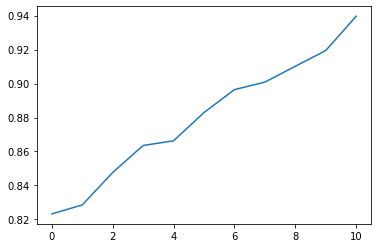

In [18]:
# 2050까지의 데이터 들고오기 
co2_2050 = pd.read_csv('../result/2030/co2_2030.csv')
CH4_2050 = pd.read_csv('../result/2030/CH4_2030.csv')
NO_2050 = pd.read_csv('../result/2030/NO_2030.csv')


co2_2050 = co2_2050.loc[co2_2050.Year >= 2020, :]
co2_2050.reset_index(drop=True, inplace=True)
CH4_2050 = CH4_2050.loc[CH4_2050.Year >= 2020, :]
CH4_2050.reset_index(drop=True, inplace=True)
NO_2050 = NO_2050.loc[NO_2050.Year >= 2020, :]
NO_2050.reset_index(drop=True, inplace=True)

data_2050 = pd.merge(co2_2050, NO_2050, on='Year')
data_2050 = pd.merge(data_2050, CH4_2050, on='Year')

x_future_data = data_2050[[  'CH4', 'NO', 'CO2']]
x_future_data_poly = poly_features.fit_transform(x_future_data)
result_2050 = list(lin_reg_temperature.predict(x_future_data_poly))
data_2050['Temperature'] = result_2050
print(data_2050)

for i in range(len(data_2050)):
    if i % 10 == 1:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.005
    elif i% 10 == 3:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.006
    elif i% 10 == 4:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.003
    elif i% 10 == 5:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.002
    elif i% 10 == 6:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.004
    elif i% 10 == 7:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.003
    elif i% 10 == 8:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.005
    elif i% 10 == 9:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] - 0.007
    else:
        data_2050.loc[i, 'Temperature'] = data_2050.loc[i, 'Temperature'] + 0.002
data_2050.loc[:,'Temperature'].plot()

      Year           CO2            NO           CH4       ice_mass  \
0   2020.0  3.179837e+10  3.124815e+09  8.536440e+09 -297962.747015   
1   2021.0  3.216606e+10  3.152652e+09  8.598050e+09 -305584.672122   
2   2022.0  3.253571e+10  3.180490e+09  8.659659e+09 -308227.007204   
3   2023.0  3.290734e+10  3.208328e+09  8.721268e+09 -311389.752262   
4   2024.0  3.328093e+10  3.236165e+09  8.782878e+09 -321572.907295   
5   2025.0  3.365649e+10  3.264003e+09  8.844487e+09 -323776.472303   
6   2026.0  3.403402e+10  3.291841e+09  8.906097e+09 -328500.447286   
7   2027.0  3.441352e+10  3.319678e+09  8.967706e+09 -337244.832245   
8   2028.0  3.479498e+10  3.347516e+09  9.029315e+09 -343509.627179   
9   2029.0  3.517841e+10  3.375354e+09  9.090925e+09 -344294.832089   
10  2030.0  3.556382e+10  3.403192e+09  9.152534e+09 -350100.446973   

    Temperature  
0      0.821205  
1      0.833490  
2      0.845583  
3      0.857505  
4      0.869273  
5      0.880906  
6      0.892421  
7  

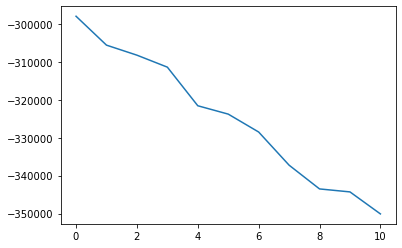

In [21]:
# 2050까지의 데이터 들고오기 
co2_2050 = pd.read_csv('../result/2030/co2_2030.csv')
CH4_2050 = pd.read_csv('../result/2030/CH4_2030.csv')
NO_2050 = pd.read_csv('../result/2030/NO_2030.csv')

# 데이터 통일하기
co2_2050 = co2_2050.loc[co2_2050.Year >= 2020, :]
co2_2050.reset_index(drop=True, inplace=True)
CH4_2050 = CH4_2050.loc[CH4_2050.Year >= 2020, :]
CH4_2050.reset_index(drop=True, inplace=True)
NO_2050 = NO_2050.loc[NO_2050.Year >= 2020, :]
NO_2050.reset_index(drop=True, inplace=True)

data_2050 = pd.merge(co2_2050, NO_2050, on='Year')
data_2050 = pd.merge(data_2050, CH4_2050, on='Year')
x_future_data = data_2050[[  'CH4', 'NO', 'CO2']]

result_2030 = list(lin_reg.predict(x_future_data))
data_2050['ice_mass'] = result_2030

for i in range(len(data_2050)):
    if i % 10 == 1:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 1500
    elif i% 10 == 3:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 3000
    elif i% 10 == 4:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 2000
    elif i% 10 == 5:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1000
    elif i% 10 == 6:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1500
    elif i% 10 == 7:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 2000
    elif i% 10 == 8:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] - 3000
    elif i% 10 == 9:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1500
    else:
        data_2050.loc[i, 'ice_mass'] = data_2050.loc[i, 'ice_mass'] + 1000
        
data_2050.loc[:, 'ice_mass'].plot()
data_2050['Temperature'] = result_2050
print(data_2050)

In [22]:
data_2050.to_csv("2020_2030_data")